In [1]:
from IPython.display import HTML

HTML('''<script> $('div.input').hide()''')


<html> <head> </head> <body> <img src="./jupyter/zeb_logo.png" width="100"> </body> </html>

## zeb.Digitale Auftragsverarbeitung


### Auswahl Antrag und Dokumente


In [1]:
from app.widget.widget import open_applications, documents_list

dropdownA, applications = open_applications()
dropdownB, uploaded = documents_list()


Bitte wähle einen offenen Antrag aus:
Bitte wähle ein Szenario aus:


Dropdown(description='Antrag:', options=(('Blanko - Ursula Müller', 'Blanko'), ('Dinglich - Ursula Müller', 'D…

Dropdown(description='Dokumente:', options=(("Blanko - Fehlerhaft - ['1.jpg', '2.jpg', '3.jpg', '4.jpg']", 0),…

### Übermittelte Unterlagen


Der folgende Antrag wurde ausgewäht:


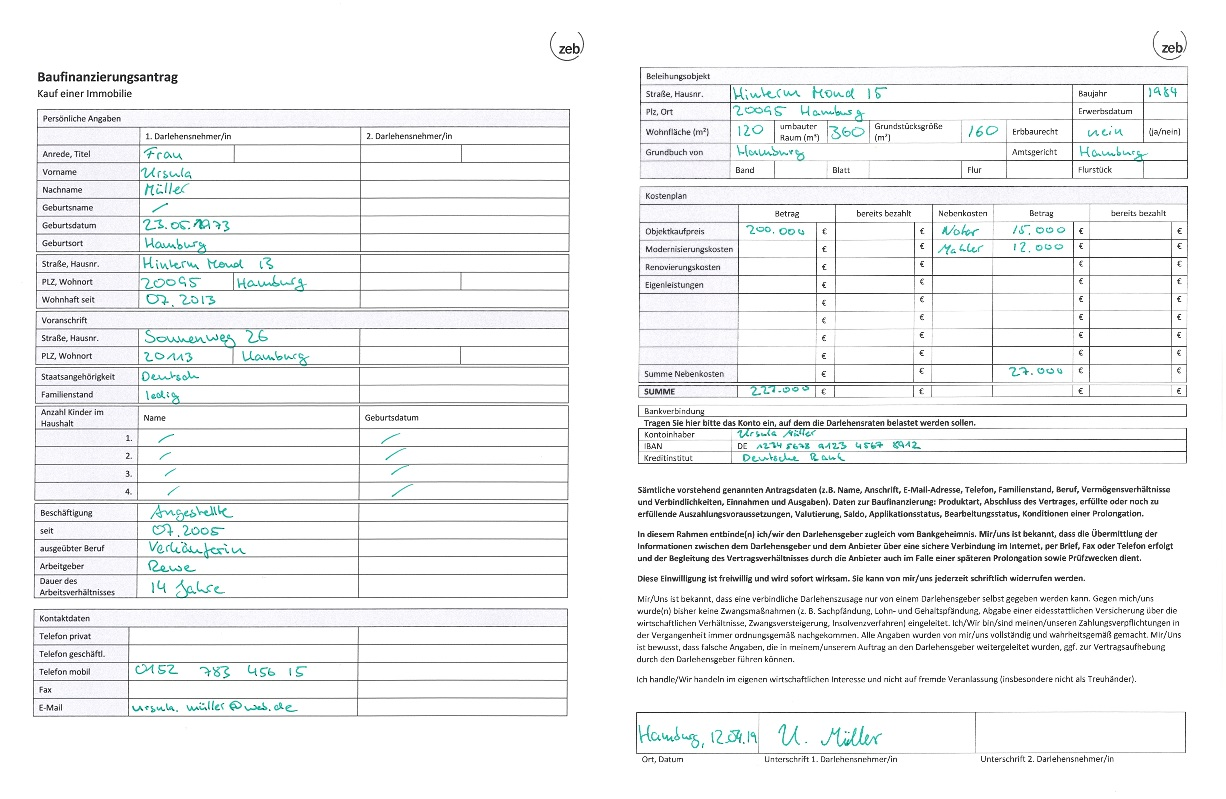

Die folgenden Dokumente wurden hochgeladen:


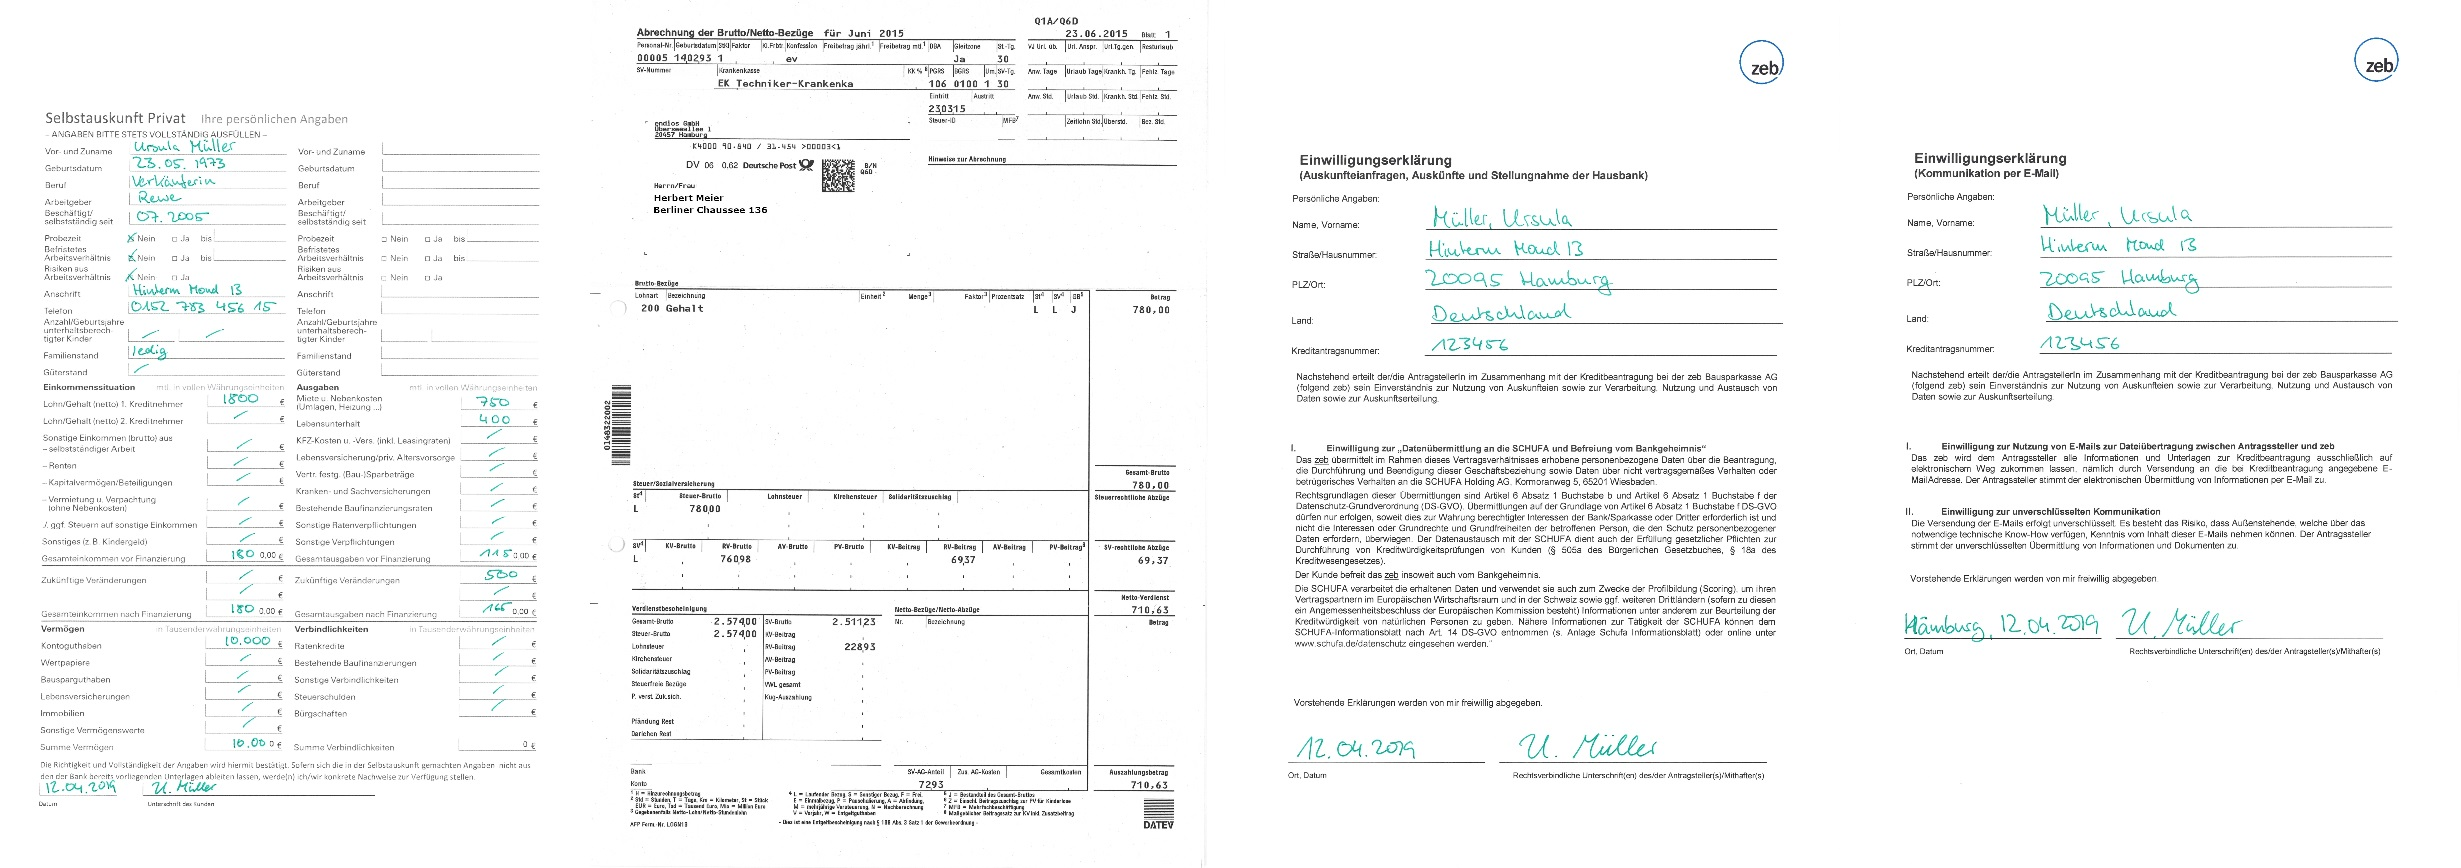

In [29]:
from app.inform.applicant import show_application, show_documents

application = dropdownA.value
documents = dropdownB.value

show_application(application)
show_documents(documents)


In [ ]:
from app.decide.document import map_to_application
from app.extract.information import extract
from app.inform.applicant import show_information

product = dropdownA.value
files = dropdownB.value
application = applications[product]

file_list = uploaded[files]

submitted, documents = map_to_application(file_list, product)
information = extract(submitted)


### Fachlich - Vollständigkeit der Dokumente


Die Dokumentencheckliste wurde wie folgt abgearbeitet:


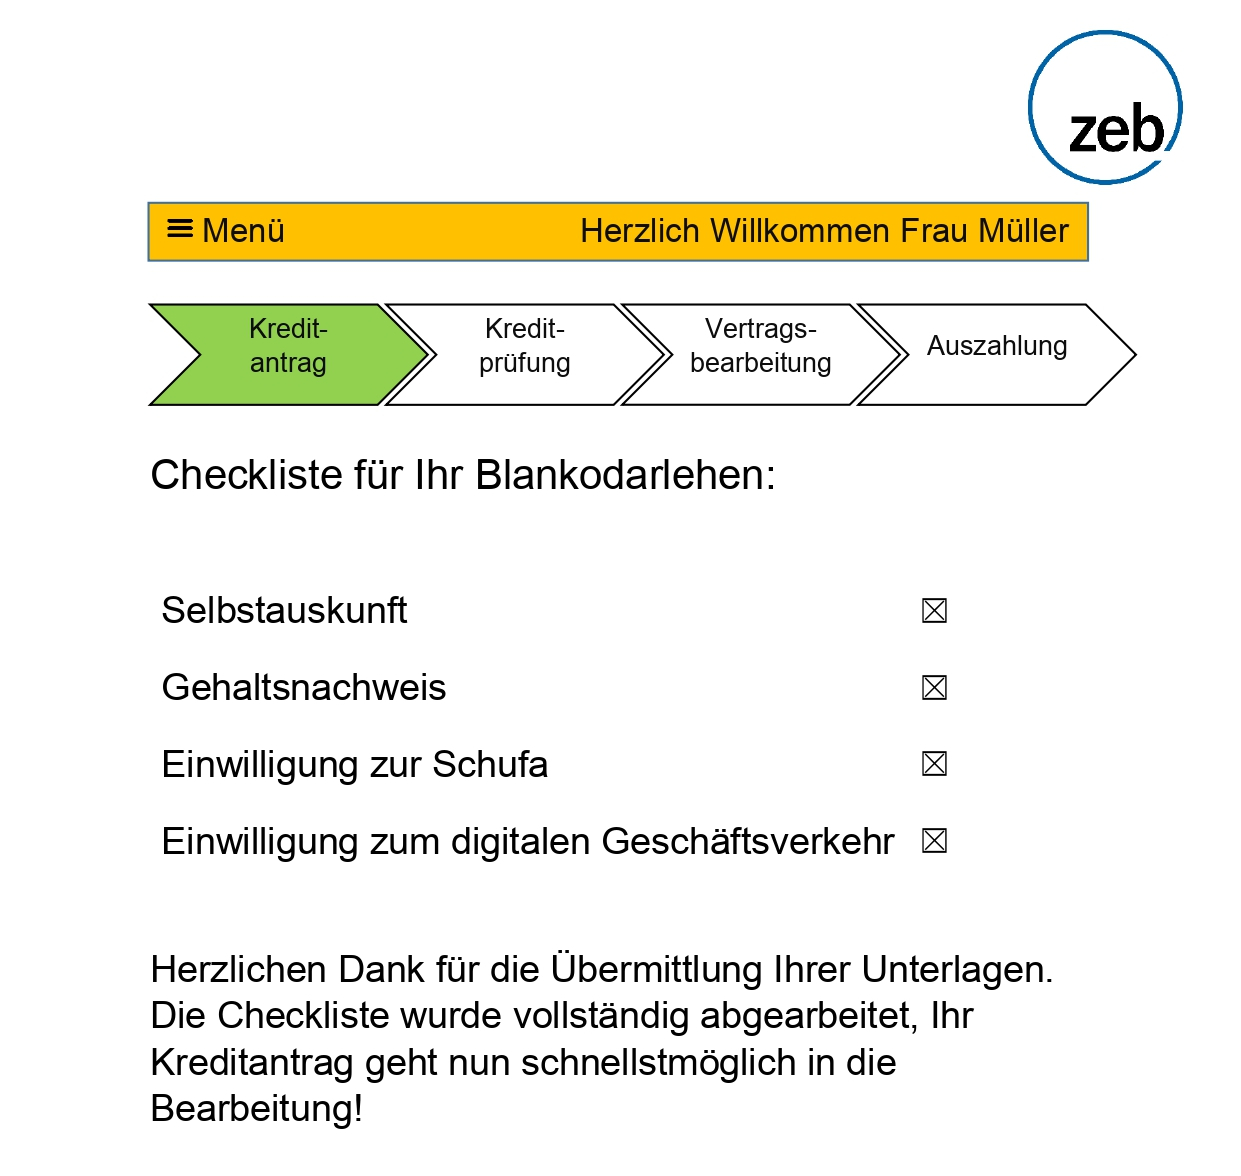

Ergebnis: Aussteuerung nicht notwendig.


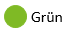

In [30]:
from app.inform.applicant import show_checklist, show_ampel

complete = show_checklist(product, files)

show_ampel(1 if complete else 3)


### Inhaltlich - Vollständigkeit der Datenfelder


In [ ]:
complete = show_information(information, product)

show_ampel(1 if complete else 3)


### Inhaltlich - Prüfung der Informationen auf Konsistenz und gegen antragsunabhängige Kriterien


In [32]:
from app.decide.information import plausible
from app.inform.applicant import show_ampel

complete = plausible(information)

show_ampel(1 if complete else 3)


Die Plausibilisierung der Informationen basiert auf folgenden Regeln:
  Name stimmt überein?                     - Nein
  Geburtsdatum stimmt überein?             - Nein
  Anschrift stimmt überein?                - Nein
  Gehaltsnachweis nicht älter als 1 Monat? - Nein
  Nettoeinkommen stimmt überein?           - Nein

=> Aussteuerung notwendig.


### Inhaltlich - Abgleich der Unterschrift


In [ ]:
from app.extract.information import extract_signature
from app.decide.document import map_to_application
from app.inform.applicant import show_ampel

# Extrahiere Datenfelder aus den Dokumenten
submitted, documents = map_to_application(file_list, product)

# Bestimmung einer Unterschriftenposition in Dokument und Vergleich Ähnlichkeit der Unterschriften zwischen den Dokumenten
probability = extract_signature(submitted, dropdownA.value, dropdownB.value)

show_ampel(1 if probability > 0.95 else 2 if probability > 0.85 else 3)


### Fachlich - Prüfung antragsspezifischer Kriterien


In [ ]:
from app.decide.information import validate
from app.inform.applicant import show_ampel

complete = validate(application, information)
show_ampel(1 if complete else 3)
